## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Reading data

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [3]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [5]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

## Checking null and invalid values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [7]:
dfn = df.copy()

In [8]:
dfn

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


## Dropping null values

In [9]:
dfn = dfn.dropna()
dfn.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
for col in dfn:
    print(col," : ",dfn[col].unique(),"\n")

gender  :  ['female' 'male'] 

race/ethnicity  :  ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental level of education  :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch  :  ['standard' 'free/reduced'] 

test preparation course  :  ['none' 'completed'] 

math score  :  ['72' '69' '90' '47' '76' '71' '88' '40' '64' '38' '58' '65' '78' '50'
 '74' '73' '67' '62' '63' '56' '81' '57' '55' '53' '59' '66' '82' '77'
 '33' '52' '0' '79' '39' '45' '60' '61' '41' '49' '44' '30' '80' '42' '27'
 '43' '68' '85' '98' '87' '70' '54' '51' '99' '84' '75' '91' '83' '89'
 '22' '100' '96' '94' '46' '97' '48' '35' '34' '86' '92' '37' '28' '24'
 '113' '123' '?' '-89' '26' '334' '95' '36' '29' '32' '93' '19' '23' '8'] 

reading score  :  [ 72.  90.  95.  57.  78.  83.  43.  64.  60.  54.  52.  81.  53.  75.
  89.   9.   8.   7.   6.   3.   5.  34.  22.  11.  12.  56.  61.  73.
  58.  65.  71.  74.  84.  55.  69.  44.  41.  85.

## Dropping invalid data

In [11]:
dfn = dfn.drop(dfn[dfn["math score"] == "?"].index)

In [12]:
dfn["math score"] = dfn["math score"].astype("int64")
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       943 non-null    object 
 1   race/ethnicity               943 non-null    object 
 2   parental level of education  943 non-null    object 
 3   lunch                        943 non-null    object 
 4   test preparation course      943 non-null    object 
 5   math score                   943 non-null    int64  
 6   reading score                943 non-null    float64
 7   writing score                943 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 66.3+ KB


In [13]:
dfn = dfn.drop(dfn[dfn["math score"] < 0].index)
for col in dfn:
    print(col," : ",dfn[col].unique(),"\n")

gender  :  ['female' 'male'] 

race/ethnicity  :  ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental level of education  :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch  :  ['standard' 'free/reduced'] 

test preparation course  :  ['none' 'completed'] 

math score  :  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  74  73  67  62
  63  56  81  57  55  53  59  66  82  77  33  52   0  79  39  45  60  61
  41  49  44  30  80  42  27  43  68  85  98  87  70  54  51  99  84  75
  91  83  89  22 100  96  94  46  97  48  35  34  86  92  37  28  24 113
 123  26 334  95  36  29  32  93  19  23   8] 

reading score  :  [ 72.  90.  95.  57.  78.  83.  43.  64.  60.  54.  52.  81.  53.  75.
  89.   9.   8.   7.   6.   3.   5.  34.  22.  11.  12.  56.  61.  73.
  58.  65.  71.  74.  84.  55.  69.  44.  41.  85.  59.  17.  39.  80.
  37.  63.  51.  49.  26.  68.  45.  47.  70.  86.  79.  66.  67.  91.
 100

# Check for outliers and skewness

In [14]:
dfn.skew(numeric_only = True)

math score        3.533335
reading score    -0.699094
writing score    11.379345
dtype: float64

## Boxplot to check outliers visually

<Axes: >

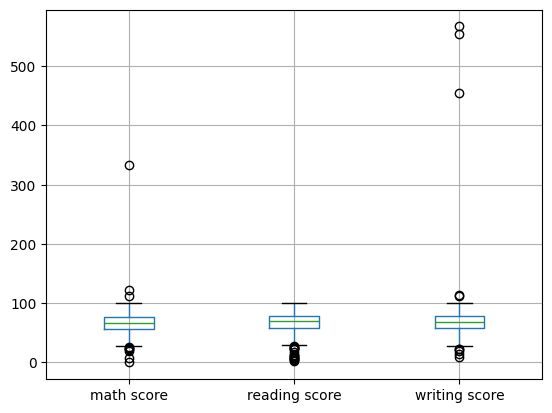

In [15]:
dfn.boxplot()

In [16]:
numeric_columns = dfn.select_dtypes(include=[np.number]).columns

In [17]:
dfn["math score"].plot(kind = "density")

<Axes: ylabel='Density'>